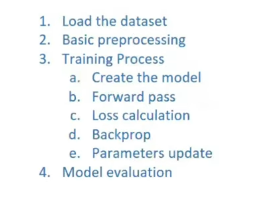

In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# df.shape returns the dimensions (rows, columns) of a DataFrame.

print(df.shape)



(569, 33)


In [5]:
# drop() removes specified columns or rows from a DataFrame.
# Here, we drop the columns 'id' and 'Unnamed: 32' in-place (modifying the original DataFrame).

df.drop(columns=['id', 'Unnamed: 32'], inplace=True)



In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### train test split

In [7]:
# train_test_split() splits the data into training and testing sets.
# df.iloc[:, 1:] selects all rows and columns from index 1 onwards (features),
# df.iloc[:, 0] selects the first column (target/label).
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training.

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

# Note: This helps in preparing the data for model training and evaluation.


### scaling

In [8]:

scaler = StandardScaler()

# Scaling the training data
X_train = scaler.fit_transform(X_train)

# Scaling the test data using the same parameters as the training data
X_test = scaler.transform(X_test)

# Note: Scaling ensures that features are on a similar scale, improving model performance.


In [9]:
X_train

array([[-0.18137586,  0.53392613, -0.22538826, ..., -0.82967201,
        -0.74822629, -0.78897852],
       [-0.7893859 ,  0.19738848, -0.61448613, ...,  2.16493561,
         5.90416214,  5.09758406],
       [ 0.9057573 ,  1.18856103,  0.95002847, ...,  0.85754084,
        -1.20208676,  0.51481833],
       ...,
       [ 0.11282255, -0.61629503,  0.06095203, ..., -0.57875631,
        -0.73394396, -1.03415648],
       [ 0.05958665,  0.16050764,  0.07232441, ...,  1.03665699,
         2.91280904,  0.99028028],
       [ 0.17726601, -0.65778597,  0.24087933, ...,  1.32599845,
         1.05928097,  1.28816005]])

In [10]:
y_train

,diagnosis
267,B
3,M
168,M
103,B
255,M
...,...
292,B
237,M
486,B
199,M


### Label Encoding

In [11]:
# LabelEncoder() converts categorical labels into numerical values.


encoder = LabelEncoder()

# Encoding the training labels
y_train = encoder.fit_transform(y_train)

# Encoding the test labels using the same encoding as the training labels
y_test = encoder.transform(y_test)

# Note: Label encoding converts categorical values into a format suitable for machine learning models.


In [12]:
y_train

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

### Numpy arrays to PyTorch tensors

In [13]:
# from_numpy() converts a NumPy array into a PyTorch tensor.

# Converting NumPy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

# Note: Converting data to tensors is necessary for PyTorch models to work with the data.


In [14]:
X_train_tensor.shape

torch.Size([455, 30])

In [15]:
y_train_tensor.shape

torch.Size([455])

### Defining the model

In [19]:
class MySimpleNN():

  # __init__ initializes the model with random weights and zero bias.
  def __init__(self, X):
    # Initialize weights (randomly) and bias (zeros)
    self.weights = torch.rand(X.shape[1], 1, dtype=torch.float64, requires_grad=True)  # weights for each feature (30X1)
    self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)  # bias for the model

  # forward() calculates the predicted output (y_pred) using the sigmoid activation function
  def forward(self, X):
    # Linear transformation: z = X * weights + bias
    z = torch.matmul(X, self.weights) + self.bias
    # Sigmoid activation to get probabilities between 0 and 1
    y_pred = torch.sigmoid(z)
    return y_pred

  # loss_function() calculates the binary cross-entropy loss
  def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0) during the loss calculation
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate binary cross-entropy loss
    loss = -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()

    return loss

# Note: The model uses binary cross-entropy as the loss function for binary classification tasks.


### Important Parameters

In [20]:
learning_rate = 0.1
epochs = 25

### Training Pipeline

In [21]:
# Create model instance
model = MySimpleNN(X_train_tensor)

# Training loop
for epoch in range(epochs):

  # Forward pass: Get predictions
  y_pred = model.forward(X_train_tensor)

  # Compute loss
  loss = model.loss_function(y_pred, y_train_tensor)

  # Backward pass: Compute gradients
  loss.backward()

  # Update parameters (weights and bias)
  with torch.no_grad():
    model.weights -= learning_rate * model.weights.grad
    model.bias -= learning_rate * model.bias.grad

  # Zero gradients for the next iteration
  model.weights.grad.zero_()
  model.bias.grad.zero_()

  # Print loss after each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

# Note: This implements gradient descent to optimize model parameters.


Epoch: 1, Loss: 3.3267050595870375
Epoch: 2, Loss: 3.174155062539496
Epoch: 3, Loss: 3.012006141165161
Epoch: 4, Loss: 2.845389405915707
Epoch: 5, Loss: 2.676725759513933
Epoch: 6, Loss: 2.5008362261148442
Epoch: 7, Loss: 2.3154514481484805
Epoch: 8, Loss: 2.1287795474392017
Epoch: 9, Loss: 1.9432362773554923
Epoch: 10, Loss: 1.7593914988126098
Epoch: 11, Loss: 1.5818497100119782
Epoch: 12, Loss: 1.4162123711123245
Epoch: 13, Loss: 1.2653412405611046
Epoch: 14, Loss: 1.132402221695886
Epoch: 15, Loss: 1.020437918232749
Epoch: 16, Loss: 0.9314203972604301
Epoch: 17, Loss: 0.8650750276701962
Epoch: 18, Loss: 0.8184720933314946
Epoch: 19, Loss: 0.7869888842489731
Epoch: 20, Loss: 0.7660053439711658
Epoch: 21, Loss: 0.7518976905929392
Epoch: 22, Loss: 0.7421564959454118
Epoch: 23, Loss: 0.7351612910066246
Epoch: 24, Loss: 0.7299080292720568
Epoch: 25, Loss: 0.7257871025951681


In [22]:
model.bias

tensor([-0.1340], dtype=torch.float64, requires_grad=True)

### Evaluation

In [23]:
# Model evaluation (no gradient calculation needed)
with torch.no_grad():

  # Forward pass on test data
  y_pred = model.forward(X_test_tensor)

  # Convert probabilities to binary predictions (threshold = 0.9)
  y_pred = (y_pred > 0.9).float()

  # Calculate accuracy
  accuracy = (y_pred == y_test_tensor).float().mean()

  # Print accuracy
  print(f'Accuracy: {accuracy.item()}')

# Note: Threshold of 0.9 means only high-confidence predictions are considered positive.


Accuracy: 0.7105262875556946
